In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import random
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, r2_score, mean_squared_error
from sklearn.datasets import load_iris
import seaborn as sns
from sklearn.model_selection import train_test_split

# Семинарская работа

In [3]:
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

Text(0, 0.5, 'X2')

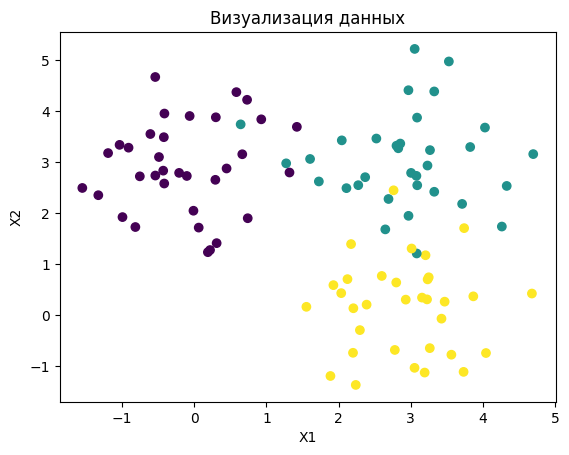

In [4]:
X, y = make_blobs(n_samples=100, centers=[(0,3),(3,3),(3,0)],
                                      n_features=2, random_state=RANDOM_SEED,
                                      cluster_std=(0.9,0.9,0.9))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Визуализация данных')
plt.xlabel('X1')
plt.ylabel('X2')

In [5]:
depth=4
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=depth,
                                  random_state=RANDOM_SEED)
clf_tree.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

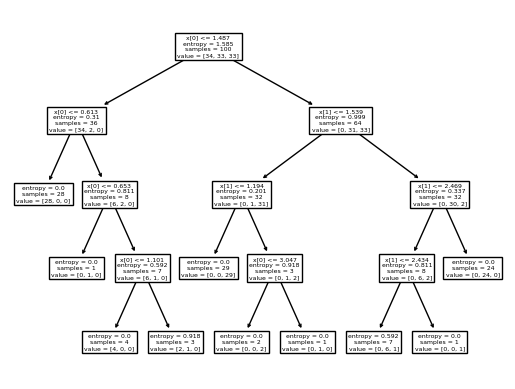

In [6]:
tree = plot_tree(clf_tree)
plt.show(tree)

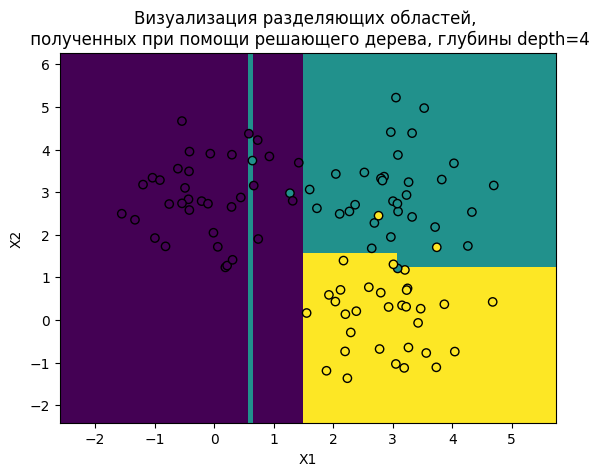

In [7]:
X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf_tree.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)

plt.title('Визуализация разделяющих областей, \n полученных при помощи решающего дерева, глубины depth={}'.format(depth))
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [8]:
y_pred = clf_tree.predict(X)
print(confusion_matrix(y, y_pred))
print('Accuracy =', accuracy_score(y, y_pred))
print('F1_score =', f1_score(y, y_pred, average='micro'))

[[34  0  0]
 [ 1 32  0]
 [ 0  1 32]]
Accuracy = 0.98
F1_score = 0.98


In [9]:
observation_new = [[2, 1]]

In [10]:
clf_tree.predict(observation_new)

array([2])

In [11]:
n_samples = 100
X = np.sort(np.random.rand(n_samples))
y = np.exp(X ** 2)+np.random.normal(0.0, 0.1, X.shape[0])

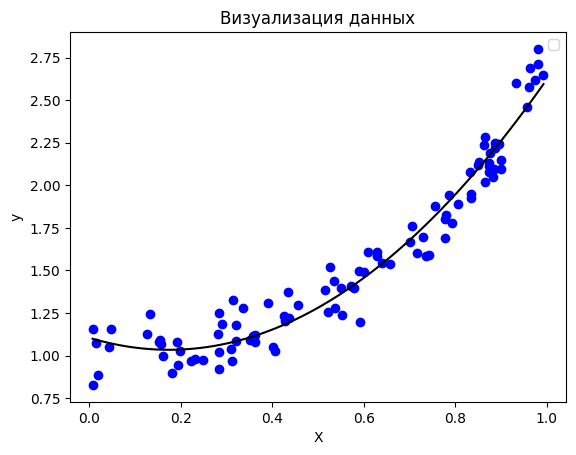

In [12]:
degree = 2
coefficients = np.polyfit(X, y, degree)
poly = np.poly1d(coefficients)


X_trendline = np.linspace(X.min(), X.max(), 100)
y_trendline = poly(X_trendline)


plt.scatter(X, y, color='blue')
plt.plot(X_trendline, y_trendline, color='black')


plt.xlabel('X')
plt.ylabel('y')
plt.title('Визуализация данных')


plt.legend()
plt.show()

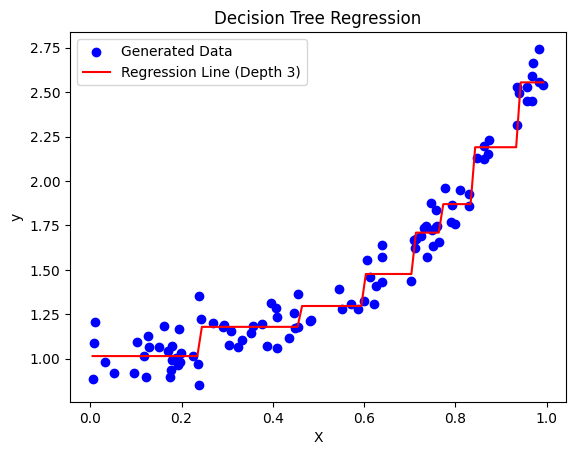

In [13]:
n_samples = 100
X = np.sort(np.random.rand(n_samples))
y = np.exp(X ** 2) + np.random.normal(0.0, 0.1, X.shape[0])


X_reshaped = X.reshape(-1, 1)


depth = 3
reg_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
reg_tree.fit(X_reshaped, y)


plt.scatter(X, y, color='blue', label='Generated Data')


X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred_reg = reg_tree.predict(X_line)
plt.plot(X_line, y_pred_reg, color='red', label=f'Regression Line (Depth {depth})')


plt.xlabel('X')
plt.ylabel('y')
plt.title('Decision Tree Regression')


plt.legend()
plt.show()

In [14]:
print('r2= ', r2_score(y, y_pred_reg))
print('MSE= ', mean_squared_error(y, y_pred_reg))

r2=  0.9326414061396564
MSE=  0.016748968610462076


# Домашняя работа

1. Загрузите встроенные данные sklearn.datasets.load_iris, взяв только последние два столбца (длина и ширина лепестков). Изобразите их на диаграмме рассеяния, подкрасив каждый класс некоторым цветом.


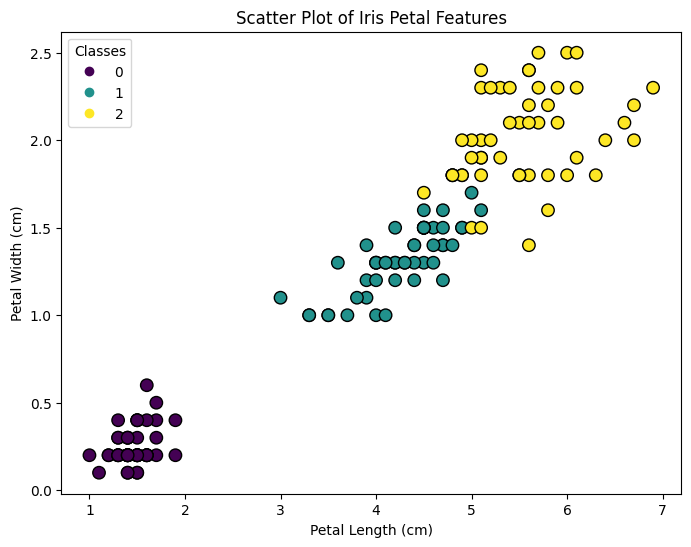

In [15]:
iris = load_iris()
X = iris.data[:, 2:]
y = iris.target


plt.figure(figsize=(8, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=80)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Scatter Plot of Iris Petal Features')
plt.legend(*scatter.legend_elements(), title='Classes')

plt.show()

2. Обучите модель классификационного дерева принятия решений sklearn.tree.DecisionTreeClassifier глубины 4, используя энтропию. Визуализируйте соответствующий граф дерева принятия решений.

In [16]:
depth=4
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=depth,
                                  random_state=RANDOM_SEED)
clf_tree.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

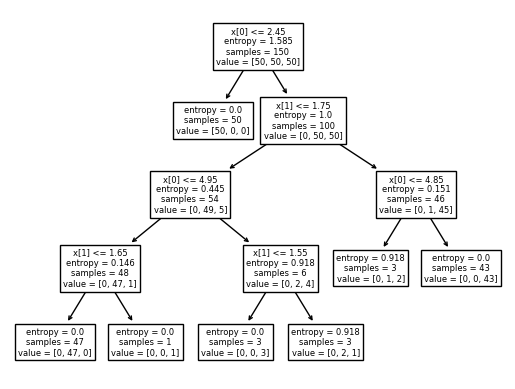

In [17]:
tree = plot_tree(clf_tree)
plt.show(tree)

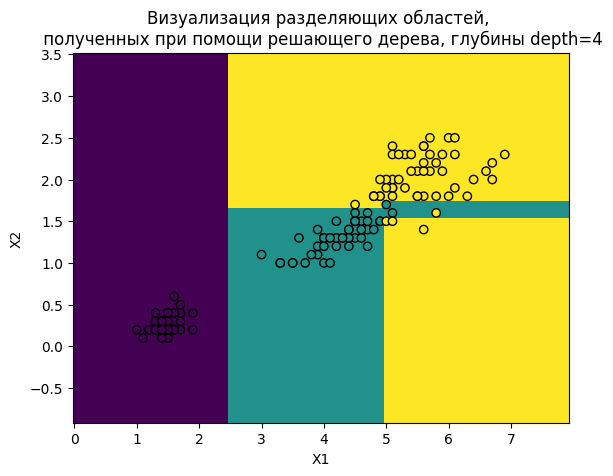

In [18]:
def plot_graph(X, y):
  X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
  X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
  X0_grid, X1_grid = np.meshgrid(X0, X1)

  y_predict = clf_tree.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
  plt.pcolormesh(X0_grid, X1_grid, y_predict)

  plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)

  plt.title('Визуализация разделяющих областей, \n полученных при помощи решающего дерева, глубины depth={}'.format(depth))
  plt.xlabel('X1')
  plt.ylabel('X2')
  plt.show()
plot_graph(X,y)

3. Обучите модель классификационного дерева принятия решений sklearn.tree.DecisionTreeClassifier с разными глубинами (1, 2, 3, 4, 10), используя энтропию, и визуализируйте в каждом случае полученные разделяющие области.
4. Выведите необходимые метрики для оценки работы моделей с разными глубинами. Сделайте вывод о том, какая модель лучше классифицирует данные.

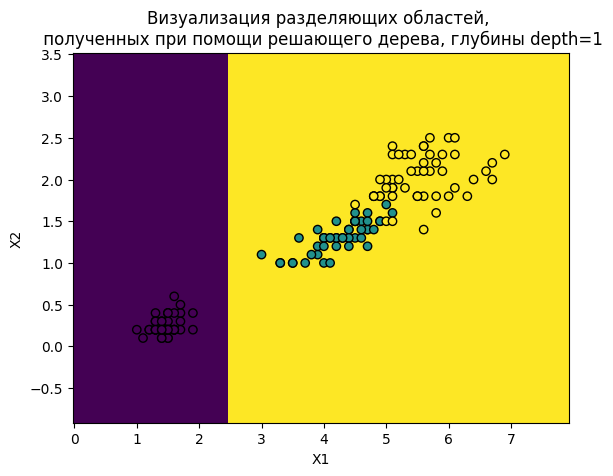

[[50  0  0]
 [ 0 50  0]
 [ 0 50  0]]
Accuracy = 0.6666666666666666
F1_score = 0.6666666666666666


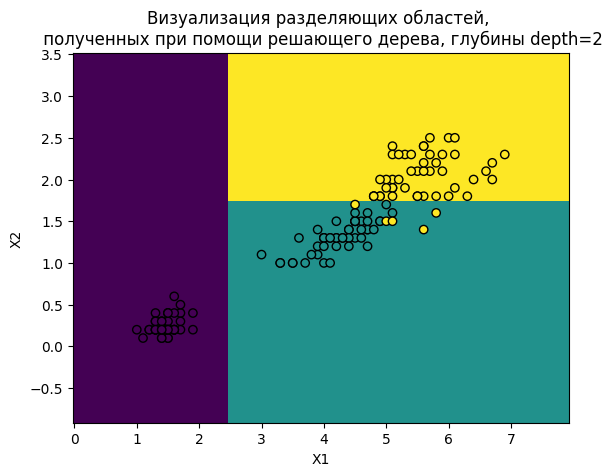

[[50  0  0]
 [ 0 49  1]
 [ 0  5 45]]
Accuracy = 0.96
F1_score = 0.96


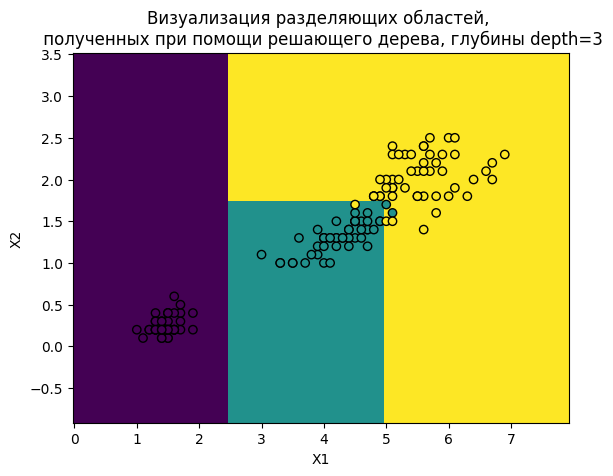

[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]
Accuracy = 0.9733333333333334
F1_score = 0.9733333333333334


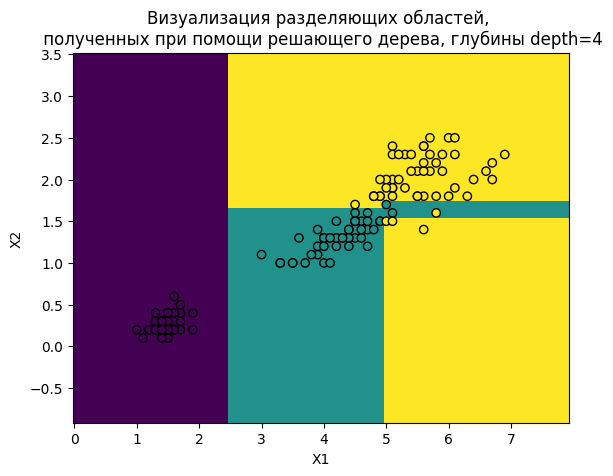

[[50  0  0]
 [ 0 49  1]
 [ 0  1 49]]
Accuracy = 0.9866666666666667
F1_score = 0.9866666666666668


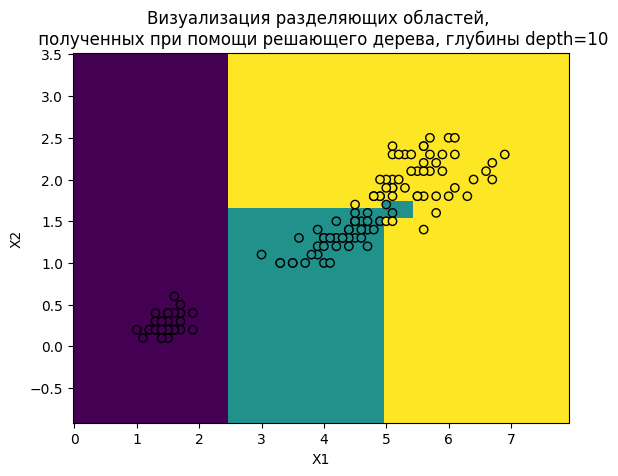

[[50  0  0]
 [ 0 49  1]
 [ 0  0 50]]
Accuracy = 0.9933333333333333
F1_score = 0.9933333333333333


In [19]:
depths = [1, 2, 3, 4, 10]

for depth in depths:
  clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=depth,
                                  random_state=RANDOM_SEED)
  clf_tree.fit(X, y)
  plot_graph(X,y)
  y_pred = clf_tree.predict(X)
  print(confusion_matrix(y, y_pred))
  print('Accuracy =', accuracy_score(y, y_pred))
  print('F1_score =', f1_score(y, y_pred, average='micro'))

Чем больше глубина дерева, тем лучше классифицирует модель, но есть риск переобучения

5. Загрузите весь датасет load_iris. Обучите модель классификационного дерева принятия решений sklearn.tree.DecisionTreeClassifier глубины 4, используя энтропию. Визуализируйте соответствующий граф дерева решений. Оцените качество работы модели.

In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

In [21]:
depth=4
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=depth,
                                  random_state=RANDOM_SEED)
clf_tree.fit(X, y)

y_pred = clf_tree.predict(X)
print(confusion_matrix(y, y_pred))
print('Accuracy =', accuracy_score(y, y_pred))
print('F1_score =', f1_score(y, y_pred, average='micro'))

[[50  0  0]
 [ 0 50  0]
 [ 0  1 49]]
Accuracy = 0.9933333333333333
F1_score = 0.9933333333333333


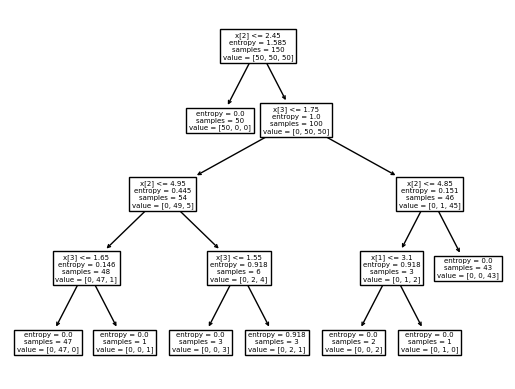

In [22]:
tree = plot_tree(clf_tree)
plt.show(tree)

6. Загрузите встроенные данные sklearn.datasets.load_iris, взяв только столбец AveBedrms в качестве единственного признака. Изобразите данные на диаграмме рассеяния так, чтобы на одной оси были отмечены значения признака, а на другой - целевой переменной.

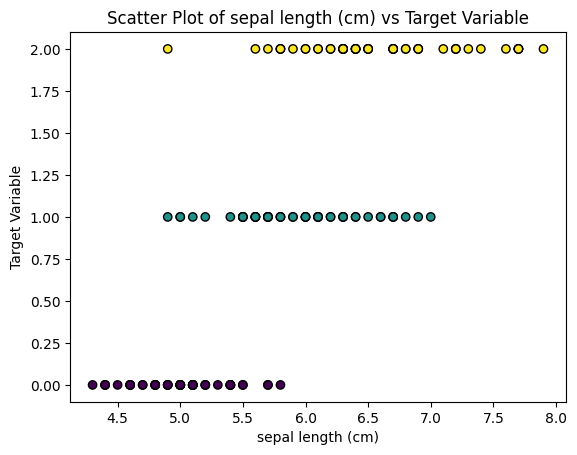

In [23]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris


iris = load_iris()
data = iris.data
target = iris.target


feature_index = 0
feature_name = iris.feature_names[feature_index]

plt.scatter(data[:, feature_index], target, c=target, cmap='viridis', edgecolor='k')
plt.xlabel(feature_name)
plt.ylabel('Target Variable')
plt.title(f'Scatter Plot of {feature_name} vs Target Variable')
plt.show()

7. Обучите модель регрессионного дерева принятия решений sklearn.tree.DecisionTreeRegressor, зафиксировав random_state=0, а остальными гиперпараметрами по умолчению.

In [66]:
iris = load_iris()
X = iris.data[:, 3:]
y = iris.target

clf_tree = DecisionTreeRegressor(random_state=0)
clf_tree.fit(X, y)

y_pred = clf_tree.predict(X)
print('r2= ', r2_score(y, y_pred))
print('MSE= ', mean_squared_error(y, y_pred))

r2=  0.9529166666666666
MSE=  0.03138888888888889


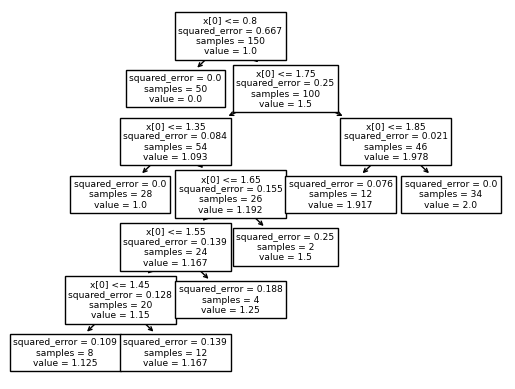

In [67]:
tree = plot_tree(clf_tree)
plt.show(tree)

8,9 Визуализируйте соответствующий граф дерева решений и получившуюся кусочную линию регрессии.

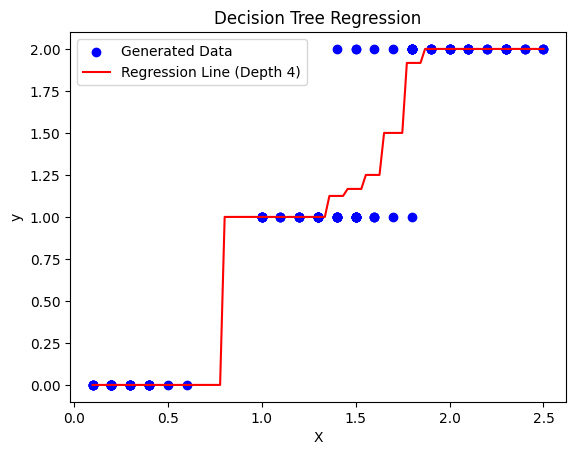

In [68]:
clf_tree = DecisionTreeRegressor(random_state=0)
clf_tree.fit(X, y)


plt.scatter(X, y, color='blue', label='Generated Data')


X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred_reg = clf_tree.predict(X_line)
plt.plot(X_line, y_pred_reg, color='red', label=f'Regression Line (Depth {depth})')


plt.xlabel('X')
plt.ylabel('y')
plt.title('Decision Tree Regression')


plt.legend()
plt.show()

10. Загрузите весь датасет fetch_california_housing. Обучите ту же модель. Визуализируйте соответствующий граф дерева решений и оцените качество работы модели.

In [69]:
from sklearn.datasets import fetch_california_housing

In [70]:
california_housing = fetch_california_housing()
X, y = california_housing.data, california_housing.target

In [71]:
clf_tree = DecisionTreeRegressor(random_state=0)
clf_tree.fit(X, y)

y_pred = clf_tree.predict(X)
r2 = r2_score(y, y_pred)
print("R^2 score:", r2)

R^2 score: 1.0
